# 1. Introduction

A brief description of your approach to the problem and the results that you 
have obtained on the training data.

\*Insert Introduction here\*

# 2. Data Import

This section is how you import the data into the notebook. It should be written in such 
a way that I can modify it to run on my own machine by simply changing the location 
of the training data and any additional data sources that you have used.

In [3]:
# I intend to use Data Frames to hold our data for now. When putting it in the model,
# I will probably have to change it to another format later but that is a problem for future me, not current me
# (Im joking; please dont deduct points, Mr/Ms Marker)
# Seriously though, Data Frames have very good performance and are malleable for data investigation,
# hence my decision to use them.

import pandas as pd
from pandas import DataFrame as df
import csv

def dataframe_from_diabetic_data_csv(csv_filepath):
    return pd.read_csv(csv_filepath)

TRAINING_DATA_FILEPATH = "BENG0095 (202425) Group Coursework Brief-20251122/Dataset/diabetic_data_training.csv"
TEST_DATA_FILEPATH = "BENG0095 (202425) Group Coursework Brief-20251122/Dataset/diabetic_data_test.csv"

training_data = dataframe_from_diabetic_data_csv(TRAINING_DATA_FILEPATH)
test_data = dataframe_from_diabetic_data_csv(TEST_DATA_FILEPATH)

print(training_data)



       encounter_id  patient_nbr             race  gender      age weight  \
0            149190     55629189        Caucasian  Female  [10-20)      ?   
1             64410     86047875  AfricanAmerican  Female  [20-30)      ?   
2            500364     82442376        Caucasian    Male  [30-40)      ?   
3             16680     42519267        Caucasian    Male  [40-50)      ?   
4             35754     82637451        Caucasian    Male  [50-60)      ?   
...             ...          ...              ...     ...      ...    ...   
91584     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
91585     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
91586     443854148     41088789        Caucasian    Male  [70-80)      ?   
91587     443857166     31693671        Caucasian  Female  [80-90)      ?   
91588     443867222    175429310        Caucasian    Male  [70-80)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \


# 3. Data Transformation and Exploration
Code for the equivalent section in your report, together with in-line documentation of 
that code.

In [4]:
# I'm going to create some helper functions that might become useful in future.
# Using a few dictionaries I'll allow for mapping from discharge IDs, admission type IDs,
# and admission source IDs, to their true meaning


id_mapping_file_path = "BENG0095 (202425) Group Coursework Brief-20251122/Dataset/IDS_mapping.csv"
admission_type_ids = {}
discharge_ids = {}
admission_source_ids = {}

with open(id_mapping_file_path, newline = '') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvreader:
        if row[0] == 'admission_type_id':
            current_dictionary = 'AT'
        elif row[0] == 'discharge_disposition_id':
            current_dictionary = 'DD'
        elif row[0] == 'admission_source_id':
            current_dictionary = 'AS'
        elif row[0] == '':
            continue
        elif current_dictionary == 'AT':
            admission_type_ids[int(row[0])] = row[1]
        elif current_dictionary == 'DD':
            discharge_ids[int(row[0])] = row[1]
        else:
            admission_source_ids[int(row[0])] = row[1]
        
def get_admission_type(admission_type_id):
    try:
        return admission_type_ids[admission_type_id]
    except:
        return 'INVALID ADMISSION TYPE ID'

def get_discharge_type(discharge_id):
    try:
        return discharge_ids[discharge_id]
    except:
        return 'INVALID DISCHARGE ID'

def get_admission_source_ids(admission_source_id):
    try:
        return admission_source_ids[admission_source_id]
    except:
        return 'INVALID ADMISSION SOURCE ID'

#print(admission_type_ids)
#print(discharge_ids)
#print(admission_source_ids)

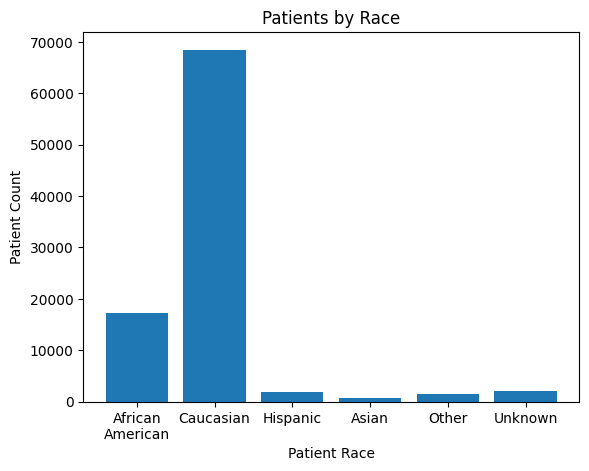

In [5]:
# I want to create some data visualisations that can provide some insights.
# I intend to use these insights to inform how I set up the model's architecture

import matplotlib
from matplotlib import pyplot as plt

# Grouping Patients by Race
african_americans = training_data[training_data['race']=='AfricanAmerican']
african_american_patients = len(african_americans)

caucasians = training_data[training_data['race'] == 'Caucasian']
caucasian_patients = len(caucasians)

hispanics = training_data[training_data['race'] == 'Hispanic']
hispanic_patients = len(hispanics)

asians = training_data[training_data['race'] == 'Asian']
asian_patients = len(asians)

others = training_data[training_data['race'] == 'Other']
other_race_patients = len(others)

unknowns = training_data[training_data['race'] == '?']
unknown_race_patients = len(unknowns)

races = ['African\nAmerican', 'Caucasian', 'Hispanic', 'Asian', 'Other', 'Unknown']
patient_counts = [african_american_patients, caucasian_patients, hispanic_patients, asian_patients, other_race_patients, unknown_race_patients]

plt.bar(races, patient_counts)
plt.title("Patients by Race")
plt.xlabel("Patient Race")
plt.ylabel("Patient Count")
plt.show()

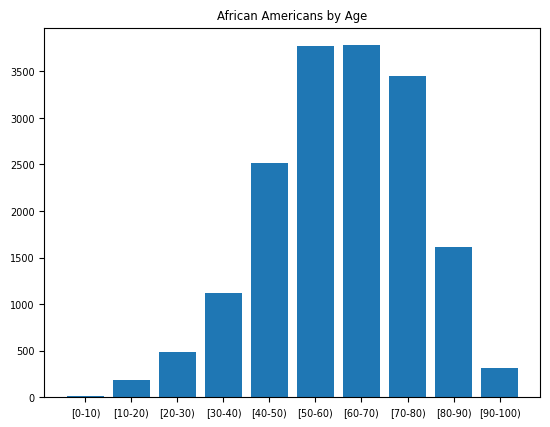

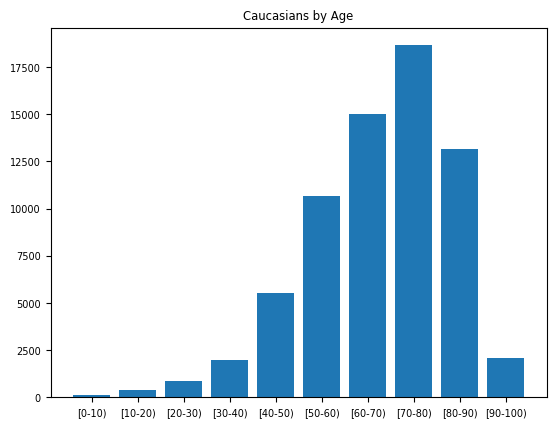

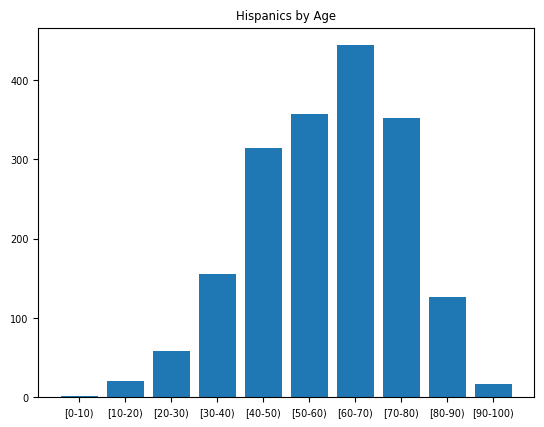

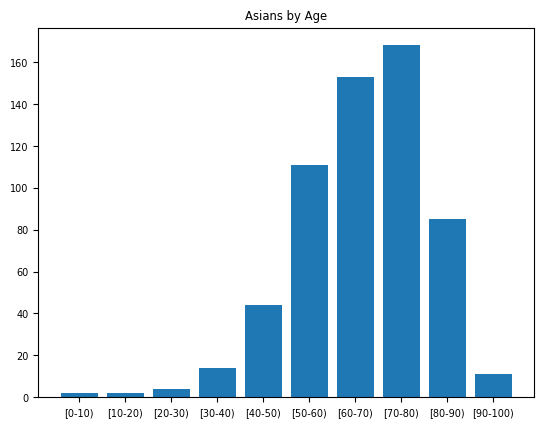

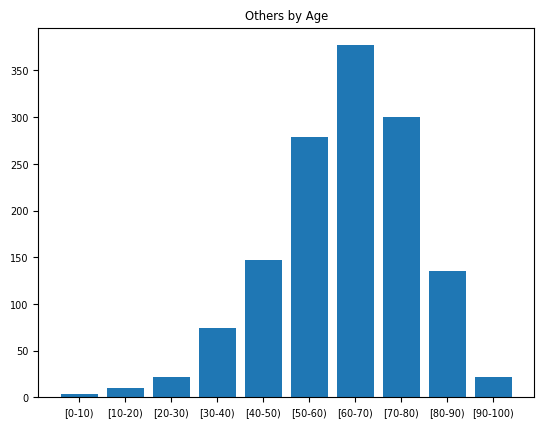

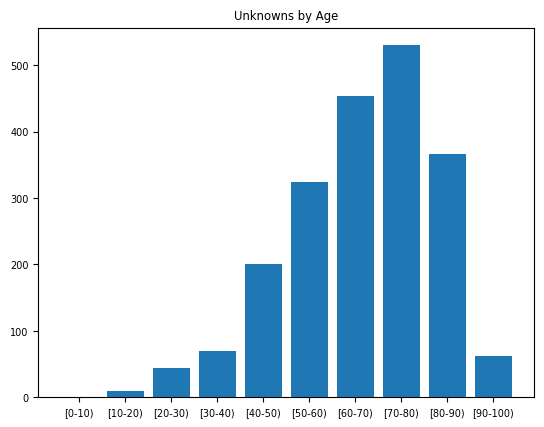

In [6]:
# Grouping patients by age within race
# '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)' '[0-10)'
age_brackets = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
african_americans_by_age = [len(african_americans[african_americans['age'] == bracket]) for bracket in age_brackets]
caucasians_by_age = [len(caucasians[caucasians['age'] == bracket]) for bracket in age_brackets]
hispanics_by_age = [len(hispanics[hispanics['age'] == bracket]) for bracket in age_brackets]
asians_by_age = [len(asians[asians['age'] == bracket]) for bracket in age_brackets]
others_by_age = [len(others[others['age'] == bracket]) for bracket in age_brackets]
unknowns_by_age = [len(unknowns[unknowns['age'] == bracket]) for bracket in age_brackets]

plt.rcParams.update({'font.size': 7})

plt.bar(age_brackets, african_americans_by_age)
plt.title('African Americans by Age')
plt.show()

plt.bar(age_brackets, caucasians_by_age)
plt.title('Caucasians by Age')
plt.show()

plt.bar(age_brackets, hispanics_by_age)
plt.title('Hispanics by Age')
plt.show()

plt.bar(age_brackets, asians_by_age)
plt.title('Asians by Age')
plt.show()

plt.bar(age_brackets, others_by_age)
plt.title('Others by Age')
plt.show()

plt.bar(age_brackets, unknowns_by_age)
plt.title('Unknowns by Age')
plt.show()

plt.rcParams.clear()
# african_american_axes = plt.subplot(3, 3, 1)
# african_american_axes.bar(age_brackets, african_americans_by_age)
# african_american_axes.set_title('African Americans by Age', fontsize = 7)


# caucasian_axes = plt.subplot(3, 3, 2)
# caucasian_axes.bar(age_brackets, caucasians_by_age)
# caucasian_axes.set_title('Caucasians by Age', fontsize = 7)


# hispanic_axes = plt.subplot(3, 3, 3)
# hispanic_axes.bar(age_brackets, hispanics_by_age)
# hispanic_axes.set_title('Hispanics by Age', fontsize = 7)


# asian_axes = plt.subplot(3, 3, 4)
# asian_axes.bar(age_brackets, asians_by_age)
# asian_axes.set_title('Asians by Age', fontsize = 7)


# other_axes = plt.subplot(3, 3, 5)
# other_axes.bar(age_brackets, others_by_age)
# other_axes.set_title('Others by Age', fontsize = 7)


# unknown_axes = plt.subplot(3, 3, 6)
# unknown_axes.bar(age_brackets, unknowns_by_age)
# unknown_axes.set_title('Unknowns by Age', fontsize = 7)


# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

# plt.show()



1:  Physician Referral
2: Clinic Referral
3: HMO Referral
4: Transfer from a hospital
5:  Transfer from a Skilled Nursing Facility (SNF)
6:  Transfer from another health care facility
7:  Emergency Room
8:  Court/Law Enforcement
9:  Not Available
10:  Transfer from critial access hospital
11: Normal Delivery
13:  Sick Baby
14:  Extramural Birth
17: NULL
20:  Not Mapped
22:  Transfer from hospital inpt/same fac reslt in a sep claim
25:  Transfer from Ambulatory Surgery Center


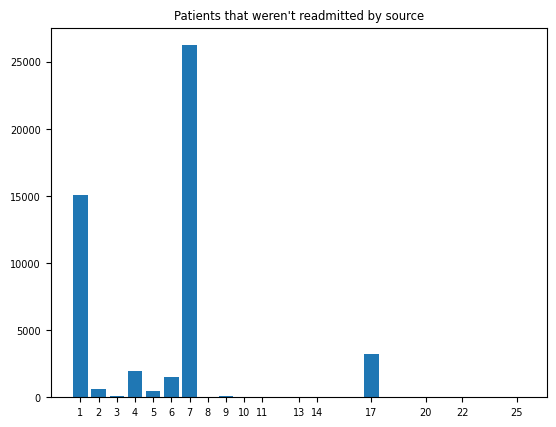

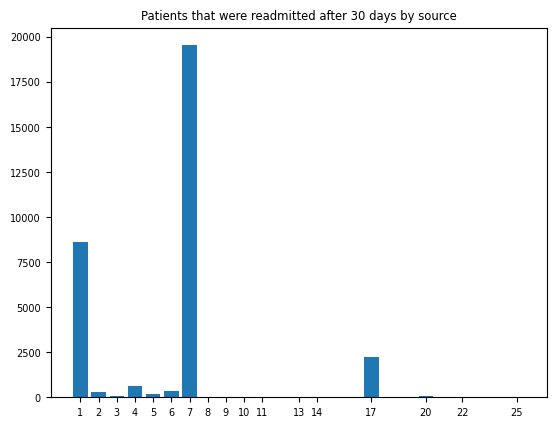

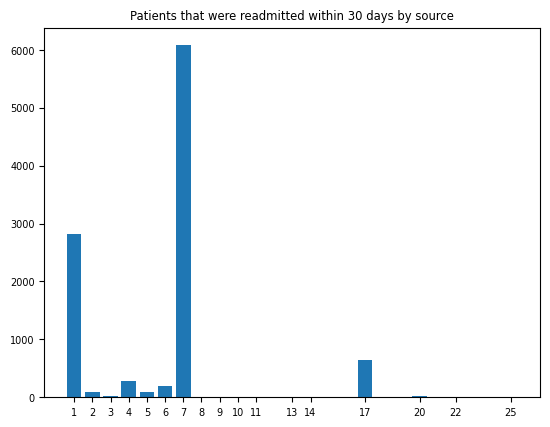

In [7]:
# Let's visualise the patient's outcome (readmittance) based on their admittance

patients_not_readmitted = training_data[training_data['readmitted'] == 'NO']
patients_readmitted_after_30_days = training_data[training_data['readmitted'] == '>30']
patients_readmitted_within_30_days = training_data[training_data['readmitted'] == '<30']

admission_sources = list(training_data['admission_source_id'].unique())
admission_sources.sort()

# Now that we have the patients separated by their outcome, lets visualise what made them go to the hospital
not_readmitted_patients_by_source = [len(patients_not_readmitted[patients_not_readmitted['admission_source_id'] == aso]) for aso in admission_sources]
readmitted_patients_after_30_days_by_source = [len(patients_readmitted_after_30_days[patients_readmitted_after_30_days['admission_source_id'] == aso]) for aso in admission_sources]
readmitted_patients_within_30_days_by_source = [len(patients_readmitted_within_30_days[patients_readmitted_within_30_days['admission_source_id'] == aso]) for aso in admission_sources]

for aso in admission_sources:
    print(f"{aso}: {get_admission_source_ids(aso)}")

plt.bar(admission_sources, not_readmitted_patients_by_source)
plt.title("Patients that weren't readmitted by source")
plt.xticks(admission_sources)
plt.show()
plt.bar(admission_sources, readmitted_patients_after_30_days_by_source)
plt.title("Patients that were readmitted after 30 days by source")
plt.xticks(admission_sources)
plt.show()
plt.bar(admission_sources, readmitted_patients_within_30_days_by_source)
plt.title("Patients that were readmitted within 30 days by source")
plt.xticks(admission_sources)
plt.show()




# print(len(patients_not_readmitted), len(patients_readmitted_after_30), len(patients_readmitted_within_30))

# 4. Methodology Overview
Code for the equivalent section in your report, together with in-line documentation of 
that code.

# 5. Model Training & Validation
Code for the equivalent section in your report, together with in-line documentation of 
that code.

In [11]:
# 5. Model Training & Validation - PyTorch binary classifier
# Predict 'readmitted' as binary: 0 = NO, 1 = readmitted ("<30" or ">30")
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Map readmitted to binary target
# Map readmitted to 3 classes: 0=NO, 1=>30 (after 30 days), 2=<30 (within 30 days)
target_map = {'NO': 0, '>30': 1, '<30': 2}
training_data['readmit_class'] = training_data['readmitted'].map(target_map)

# Drop identifier-like columns (if present) and the original target
drop_cols = ['readmitted', 'encounter_id', 'patient_nbr']
X = training_data.drop(columns=[c for c in drop_cols if c in training_data.columns])
y = training_data['readmit_class'].astype(int)

# One-hot encode categorical variables and align later with test set
X_encoded = pd.get_dummies(X, drop_first=True)
# Ensure all columns are numeric and no objects remain (coerce non-numeric -> NaN -> fill 0)
X_encoded = X_encoded.fillna(0)
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = pd.to_numeric(X_encoded[col], errors='coerce').fillna(0)
# Final dtype cast to float32 for PyTorch
X_encoded = X_encoded.astype(np.float32)

# Train/validation split from provided training set
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric columns (fit on train only)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

# Convert to tensors and create DataLoaders (targets are integer class labels)
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)
X_val_t = torch.tensor(X_val.values, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.long)

batch_size = 128
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=batch_size)

# Define a deeper MLP classifier with skip connections
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, extra_linear_layers=10):
        """Creates an MLP with an initial projection, followed by `extra_linear_layers`
        linear layers (each followed by ReLU+Dropout). Skip (residual) connections are
        added every two blocks to help gradient flow.
        """
        super().__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.input_act = nn.ReLU()
        self.input_drop = nn.Dropout(0.2)

        # Build body: repeated [Linear(hidden_dim, hidden_dim), ReLU, Dropout]
        body_layers = []
        for _ in range(extra_linear_layers):
            body_layers.append(nn.Linear(hidden_dim, hidden_dim))
            body_layers.append(nn.ReLU())
            body_layers.append(nn.Dropout(0.1))
        self.body = nn.Sequential(*body_layers)

        self.output_layer = nn.Linear(hidden_dim, 3)

    def forward(self, x):
        # initial projection
        h = self.input_layer(x)
        h = self.input_act(h)
        h = self.input_drop(h)

        # apply body in blocks of (Linear, ReLU, Dropout)
        modules = list(self.body)
        num_blocks = len(modules) // 3
        for b in range(num_blocks):
            idx = b * 3
            linear = modules[idx]
            relu = modules[idx + 1]
            drop = modules[idx + 2]

            # store residual at start of every 2-block group
            if b % 2 == 0:
                res = h

            h = linear(h)
            h = relu(h)
            h = drop(h)

            # add residual after two blocks
            if b % 2 == 1:
                # ensure shapes match (they will, since hidden_dim remains constant)
                h = h + res

        out = self.output_layer(h)
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(X_train.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
# Choose optimizer: 'adam' or 'sgd'
optimizer_name = 'adam'  # options: 'adam', 'sgd'
if optimizer_name.lower() == 'adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
elif optimizer_name.lower() == 'sgd':
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
else:
    raise ValueError(f'Unsupported optimizer: {optimizer_name}')

# Training loop
def evaluate_loader(loader, model):
    model.eval()
    preds = []
    trues = []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            pred_classes = logits.argmax(dim=1).cpu().numpy()
            preds.extend(pred_classes.tolist())
            trues.extend(yb.numpy().astype(int).tolist())
    return np.array(trues), np.array(preds)

n_epochs = 15
for epoch in range(1, n_epochs+1):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    y_val_true, y_val_pred = evaluate_loader(val_loader, model)
    val_acc = accuracy_score(y_val_true, y_val_pred)
    prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(y_val_true, y_val_pred, average='macro', zero_division=0)
    print(f'Epoch {epoch:02d} | Loss: {epoch_loss:.4f} | Val Acc: {val_acc:.4f} | F1_macro: {f1_macro:.4f}')



Epoch 01 | Loss: 0.3128 | Val Acc: 0.9627 | F1_macro: 0.9593
Epoch 02 | Loss: 0.0744 | Val Acc: 0.9728 | F1_macro: 0.9688
Epoch 03 | Loss: 0.0480 | Val Acc: 0.9776 | F1_macro: 0.9749
Epoch 04 | Loss: 0.0312 | Val Acc: 0.9812 | F1_macro: 0.9785
Epoch 05 | Loss: 0.0234 | Val Acc: 0.9849 | F1_macro: 0.9822
Epoch 06 | Loss: 0.0184 | Val Acc: 0.9860 | F1_macro: 0.9843
Epoch 07 | Loss: 0.0148 | Val Acc: 0.9876 | F1_macro: 0.9850
Epoch 08 | Loss: 0.0120 | Val Acc: 0.9891 | F1_macro: 0.9871
Epoch 09 | Loss: 0.0080 | Val Acc: 0.9885 | F1_macro: 0.9864
Epoch 10 | Loss: 0.0085 | Val Acc: 0.9899 | F1_macro: 0.9882
Epoch 11 | Loss: 0.0070 | Val Acc: 0.9901 | F1_macro: 0.9891
Epoch 12 | Loss: 0.0050 | Val Acc: 0.9900 | F1_macro: 0.9881
Epoch 13 | Loss: 0.0056 | Val Acc: 0.9907 | F1_macro: 0.9891
Epoch 14 | Loss: 0.0039 | Val Acc: 0.9906 | F1_macro: 0.9888
Epoch 15 | Loss: 0.0044 | Val Acc: 0.9911 | F1_macro: 0.9897


# 6. Results
Code for the equivalent section in your report, together with in-line documentation of 
that code.

# 7. Final Predictions on Test Set
Code for the equivalent section in your report, together with in-line documentation of 
that code.

In [12]:
# Prepare test set using same preprocessing + column alignment
# Drop same identifier columns if present
test_X = test_data.drop(columns=[c for c in drop_cols if c in test_data.columns])
test_y = test_data['readmitted'].map(target_map).astype(int) if 'readmitted' in test_data.columns else None
test_encoded = pd.get_dummies(test_X, drop_first=True)
# Align columns to training encoding
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)
# Ensure numeric types and fill missing
test_encoded = test_encoded.fillna(0)
for col in test_encoded.columns:
    if test_encoded[col].dtype == 'object':
        test_encoded[col] = pd.to_numeric(test_encoded[col], errors='coerce').fillna(0)
test_encoded = test_encoded.astype(np.float32)
# Scale numeric columns with previously fitted scaler
test_encoded[numeric_cols] = scaler.transform(test_encoded[numeric_cols])

X_test_t = torch.tensor(test_encoded.values, dtype=torch.float32).to(device)

model.eval()
with torch.no_grad():
    logits = model(X_test_t)
    preds_test = logits.argmax(dim=1).cpu().numpy()

if test_y is not None:
    acc = accuracy_score(test_y.values, preds_test)
    report = precision_recall_fscore_support(test_y.values, preds_test, average=None, zero_division=0)
    prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(test_y.values, preds_test, average='macro', zero_division=0)
    print('\nTest set metrics:')
    print(f'Accuracy: {acc:.4f} | F1_macro: {f1_macro:.4f}')
    from sklearn.metrics import classification_report
    print('\nClassification report (rows=classes 0=NO,1=>30,2=<30):')
    print(classification_report(test_y.values, preds_test, zero_division=0))
else:
    print('Test set does not contain the readmitted column; produced predictions in `preds_test`.')


Test set metrics:
Accuracy: 0.5402 | F1_macro: 0.2361

Classification report (rows=classes 0=NO,1=>30,2=<30):
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      5509
           1       0.34      0.00      0.01      3556
           2       0.00      0.00      0.00      1112

    accuracy                           0.54     10177
   macro avg       0.29      0.33      0.24     10177
weighted avg       0.41      0.54      0.38     10177

